In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
%matplotlib inline

In [3]:
ds=pd.read_excel('NormalizedStudent.xlsx')
del ds['Unnamed: 0']
ds = ds.assign(G12avg=ds.loc[:, ["G1", "G2"]].mean(axis=1))
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G12avg
0,0,0,0.428571,1,0,0,1.00,1.00,0.00,1.00,...,0.50,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789,0.30,0.220395
1,0,0,0.285714,1,0,1,0.25,0.25,0.00,0.50,...,0.50,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158,0.30,0.194079
2,0,0,0.000000,1,1,1,0.25,0.25,0.00,0.50,...,0.50,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053,0.50,0.335526
3,0,0,0.000000,1,0,1,1.00,0.50,0.25,0.75,...,0.25,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842,0.75,0.743421
4,0,0,0.142857,1,0,1,0.75,0.75,0.50,0.50,...,0.50,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316,0.50,0.356908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,0.714286,1,1,0,0.50,0.50,0.75,0.75,...,1.00,0.75,0.75,1.00,0.75,0.146667,0.3750,0.473684,0.45,0.424342
391,1,1,0.285714,1,1,1,0.75,0.25,0.75,0.75,...,0.75,1.00,0.50,0.75,0.25,0.040000,0.6875,0.842105,0.80,0.764803
392,1,1,0.857143,0,0,1,0.25,0.25,0.50,0.50,...,1.00,0.50,0.50,0.50,0.50,0.040000,0.4375,0.421053,0.35,0.429276
393,1,1,0.428571,0,1,1,0.75,0.50,0.75,0.50,...,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579,0.50,0.565789


In [4]:
Aggds = ds[['G12avg', 'G3']]
Aggds

,G12avg,G3
0,0.220395,0.30
1,0.194079,0.30
2,0.335526,0.50
3,0.743421,0.75
4,0.356908,0.50
...,...,...
390,0.424342,0.45
391,0.764803,0.80
392,0.429276,0.35
393,0.565789,0.50


In [5]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)



In [6]:
complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete')
single = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single')
average = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='average')

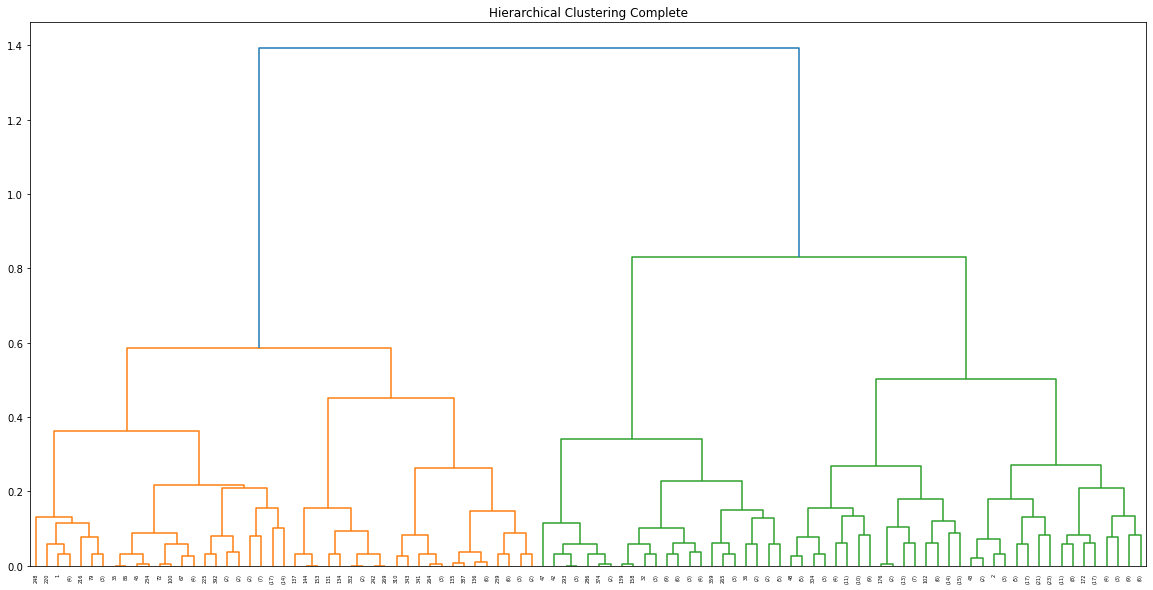

In [7]:
model = complete.fit(Aggds)
fig= plt.subplots(figsize=(20,10))
plt.title("Hierarchical Clustering Complete")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.show()

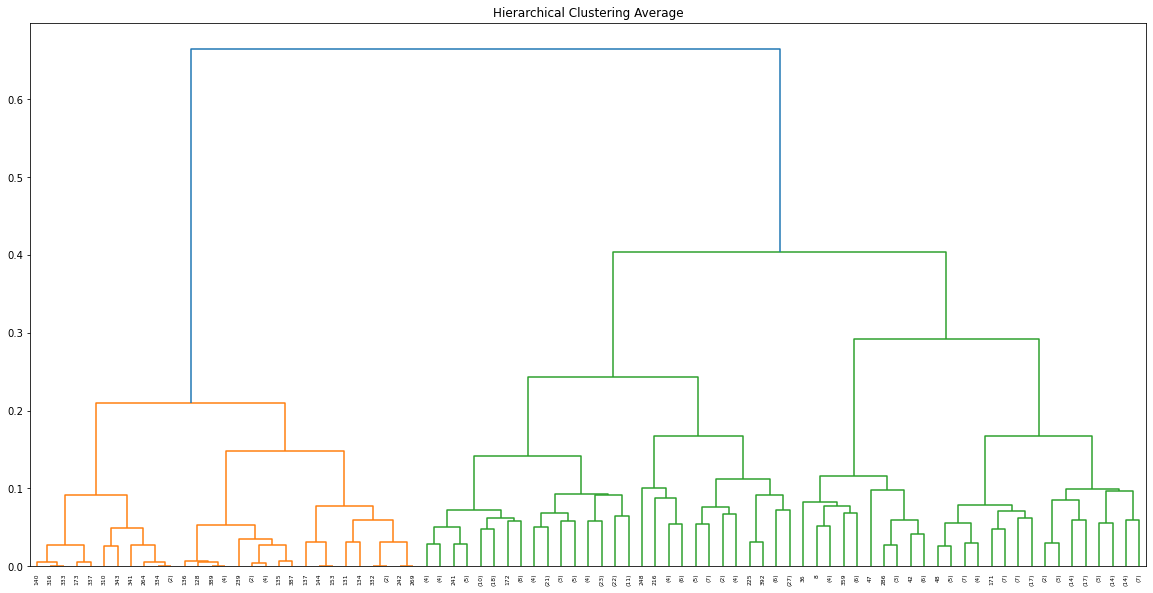

In [8]:
model = average.fit(Aggds)
fig= plt.subplots(figsize=(20,10))
plt.title("Hierarchical Clustering Average")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.show()

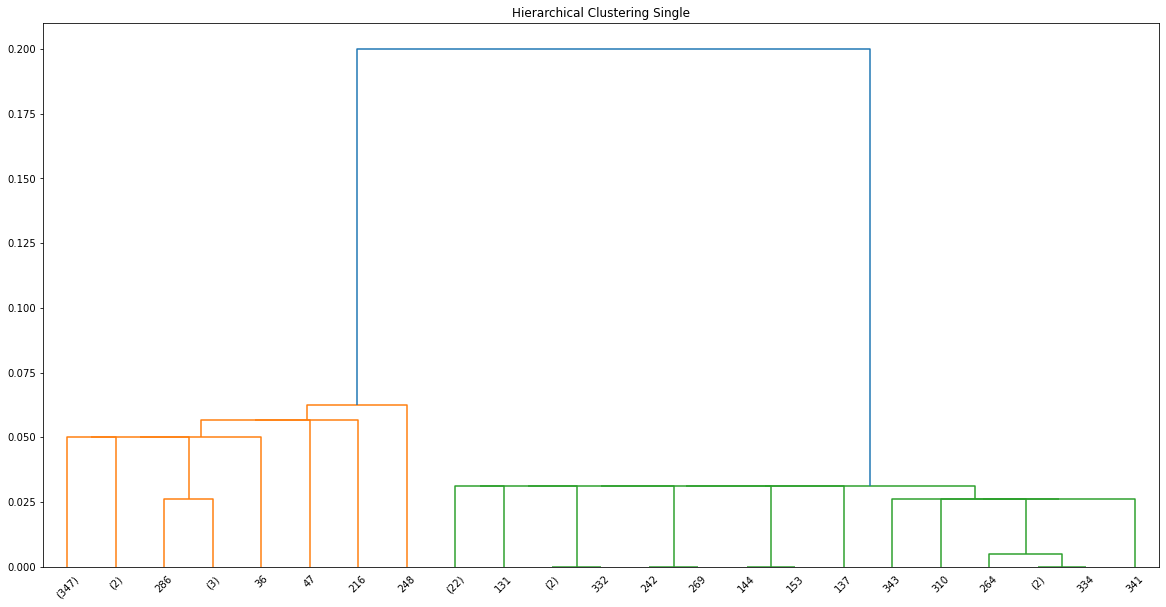

In [9]:
model = single.fit(Aggds)
fig= plt.subplots(figsize=(20,10))
plt.title("Hierarchical Clustering Single")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.show()